# <center> The Study of Wine Quality <center>


### Part A.

<b>1. Importing necessary libraries </b>: Pandas, Numpy, Seaborn, Matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
plt.rcParams['figure.figsize'] = [20,30] # Default chart area

2. <b>Reading the file - Red wine</b>
    <br> Loading the file in the variable <b> "wine" </b> </br>

In [3]:
wine = pd.read_csv("C:/Users/amrit/OneDrive/Documents/Academics/02 Stats Methods/Wine Project/winequality-red.csv",sep=";")
# Checking the first five records
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<b>2. Assignment Questions</b>
    <br> &nbsp; &nbsp; a. What is the sample size?
    <br> &nbsp; &nbsp; b. Any outliers? Do you have any concerns about the data quality?
    <br> &nbsp; &nbsp; c. How can you summarize the data of each variable in a concise way? What statistics are you going to present?
    <br> &nbsp; &nbsp; d. How can you visualize the distribution of each variable?
    <br> &nbsp; &nbsp; e. Do you see any skewed distributions?

##### 2.a. What is the sample size?

In [4]:
wine.shape

(1599, 12)

&nbsp; &nbsp; &nbsp; &nbsp; Answer - Given dataset consists of 1599 records (columns) and 12 variables (rows)

In [5]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

##### 2.b. Any outliers? Do you have any concerns about the data quality?
<br> To examine the data quality, we will check for the null values and the outliers

In [4]:
#Checking the count of null values in the data 
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [51]:
#Checking if there are duplicate records
duplicate_rows = wine[wine.duplicated()]
duplicate_rows.shape

(240, 12)

#### There are <b>240</b> duplicate records in the data

In [52]:
wine_deduplicated = wine.drop_duplicates()
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


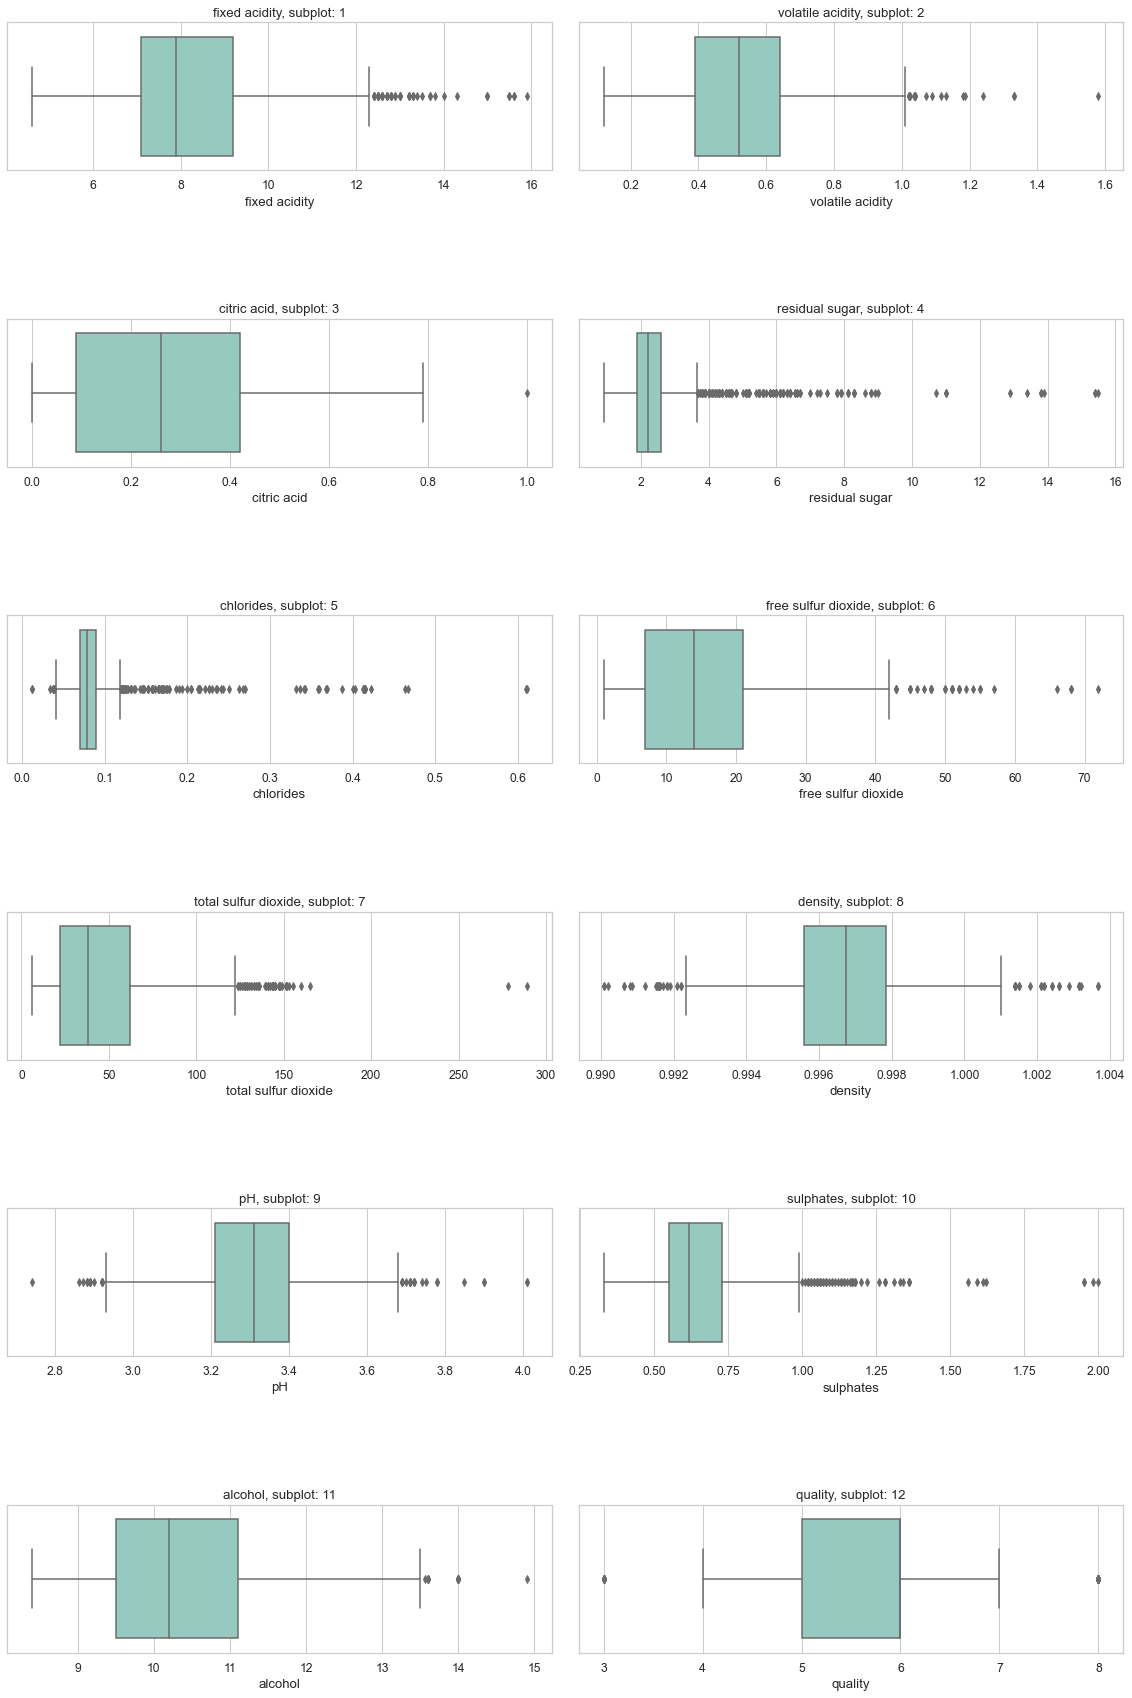

In [40]:
# Checking the outliers by creating boxplots for each variable
a = 6  
b = 2  
c = 1 

plt.subplots_adjust(wspace=0.05, hspace=1)
for i in wine:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}'.format(i, c))
    plt.xlabel(i)
    sns.boxplot(wine[i], color = 0.7, saturation=0.75, palette="Set3")
    c = c + 1
plt.show()


In [55]:
Q1 = wine.quantile(0.25)
Q3 = wine.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


In [66]:
wine_outliers = wine[~((wine < (Q1 - 1.5 * IQR)) |(wine > (Q3 + 1.5 * IQR))).any(axis=1)]
a = list(wine_outliers.shape)
b=list(wine.shape)
print("No. of records containing outliers", b[0] - a[0] )

No. of records containing outliers 420


Also, the qulaity of red wines is in the range of 1-6, but in our data we do not see the qualities 1 and 2

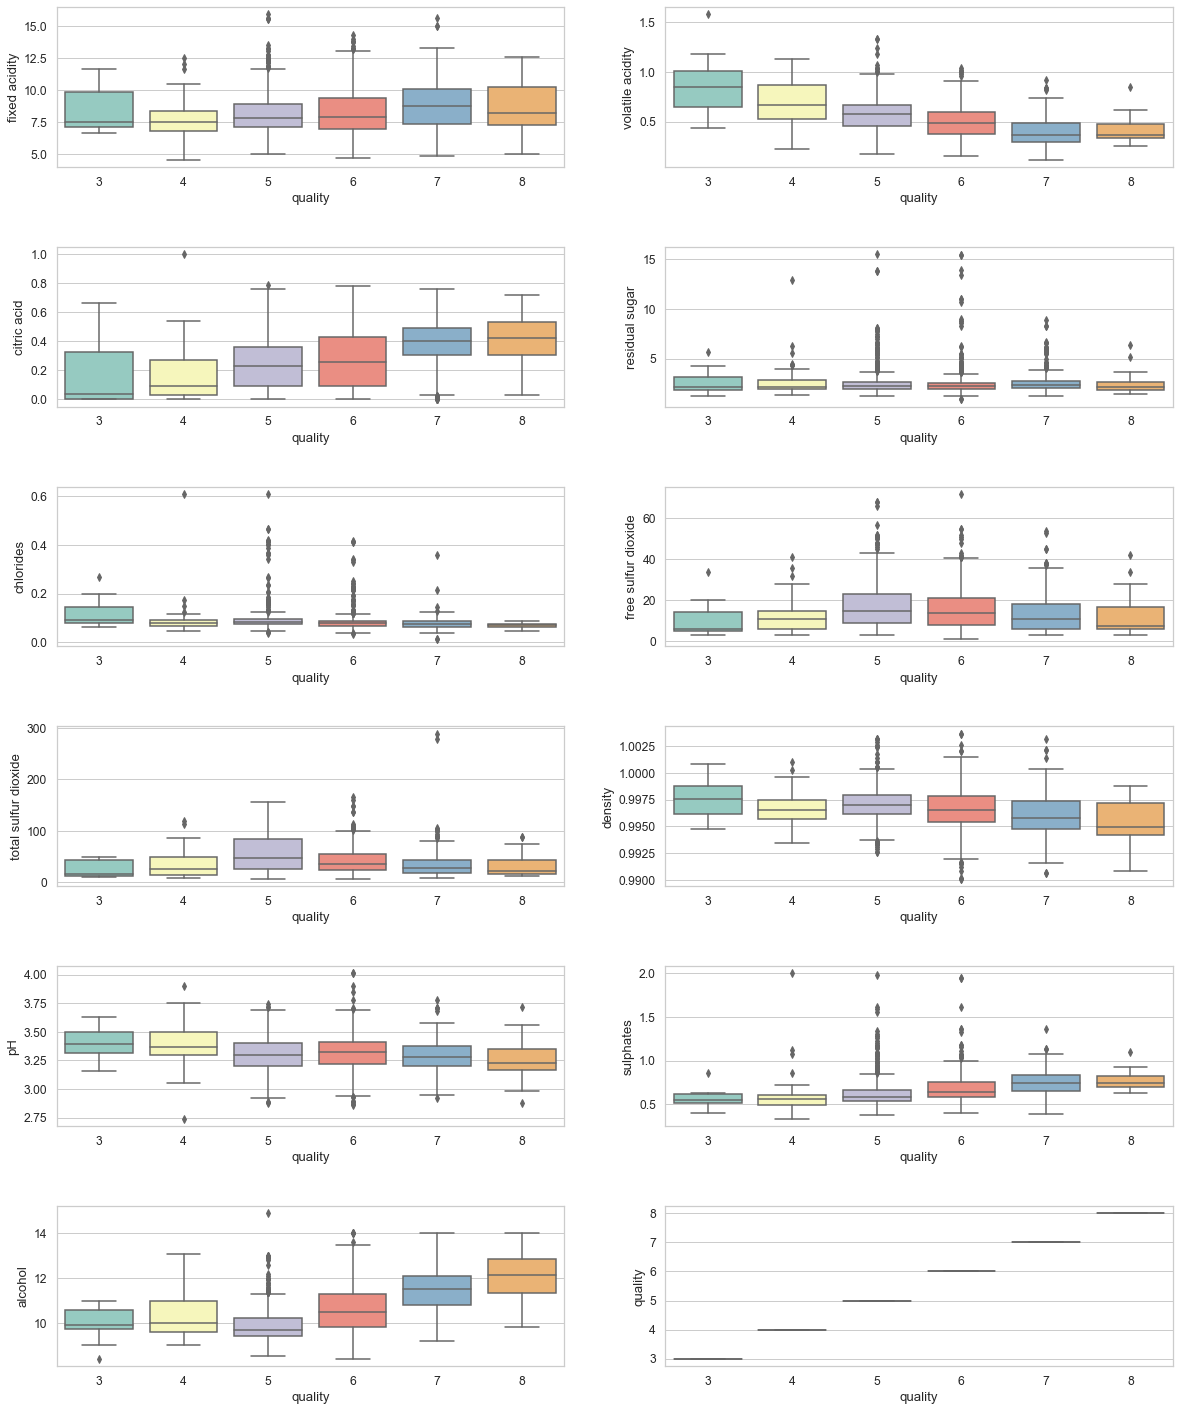

In [35]:
# Also checking the outliers wrt the quality
fig, ax = plt.subplots(6, 2, figsize = (20,25))
plt.subplots_adjust(wspace=0.2, hspace=0.5)
for var, subplot in zip(wine.columns, ax.flatten()):
    sns.boxplot(x='quality', y=var, data=wine, ax = subplot ,color = 'blue' , palette = "Set3")

<AxesSubplot:xlabel='quality', ylabel='count'>

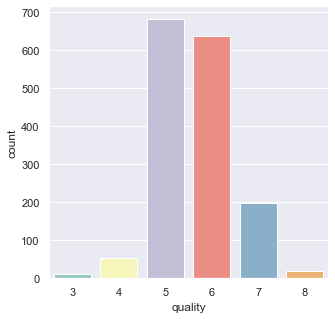

In [79]:
plt.figure(figsize=(5,5))
sns.countplot(x='quality',data=wine,  palette="Set3")

<b>Observations: </b>
<br>i. Null Values : <b>No null values</b>
<br> ii. Duplicate Records : There are <b>240 duplicate records</b> in the data. The presence of duplicate records in the data by causing redundancy, ideally these records should be removed
<br> ii.Outliers : As observed in the plots above, all the variables consist of outliers. Also using the inter quartile ranges, we can see that there are <b>420 outlier records</b> in the data which fall outside the inter quartile range.Citric acid and alcohol have less outliers as compared to the other variables
<br> Target Variable : Qualities <b>1,2,9 and 10 are missing</b> from the dataset provided


##### 2.c. How can you summarize the data of each variable in a concise way? What statistics are you going to present?

In [6]:
# Describing the data
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


	<br><b>1.fixed acidity</b>	The distribution here is rightly skewed based on the sign and magnitude of skewed score. Kurtosis score 1.13 suggests that there is a peak
<br><b>2.volatile acidity</b>	The distribution here is rightly skewed based on the skewed score. Kurtosis score 1.13 suggests that there is a peak. We can observe two peaks in the distribution
<br><b>3. citric acid</b>	The distribution here is rightly skewed based on the skewed score .  We can observe multiple peaks in the distribution
<br><b>4. residual sugar</b>	The distribution here is rightly skewed based on the skewed score and the high magnitude 4.54 suggests the points are towards the tail.  We can observe a narrow distribution 
<br><b>5. chlorides</b>	The distribution here is rightly skewed based on the skewed score and the high magnitude 5.64 suggests the points are towards the tail.  We can observe a narrow distribution. 
<br><b>6. free sulfur dioxide</b>	The distribution here is rightly skewed based on the skewed score and the magnitude 1.25
<br><b>7. total sulfur dioxide</b>	The distribution here is rightly skewed based on the skewed score and the magnitude 1.51 suggests the distribution is skewed
<br><b>8. density</b>	The distribution here is symmetric on the skewed score and the low magnitude 0.07 suggests the distribution is a little skewed and mostly symmetric
<br><b>9. pH</b> The distribution here is almost symmetric as suggested by the low skew score.  We can observe a symmetric narrow distribution. 
<br><b>10. sulphates</b>	The distribution here is rightly skewed based on the skewed score and the magnitude 2.42 suggests the points are towards the tail.  We can observe a narrow distribution. 
<br><b>11. alcohol</b>	The distribution here is almost symmetric as suggested by the low skew score.  We can observe a symmetric narrow distribution. The kurtosis score is also low here


##### 2.d. How can you visualize the distribution of each variable?

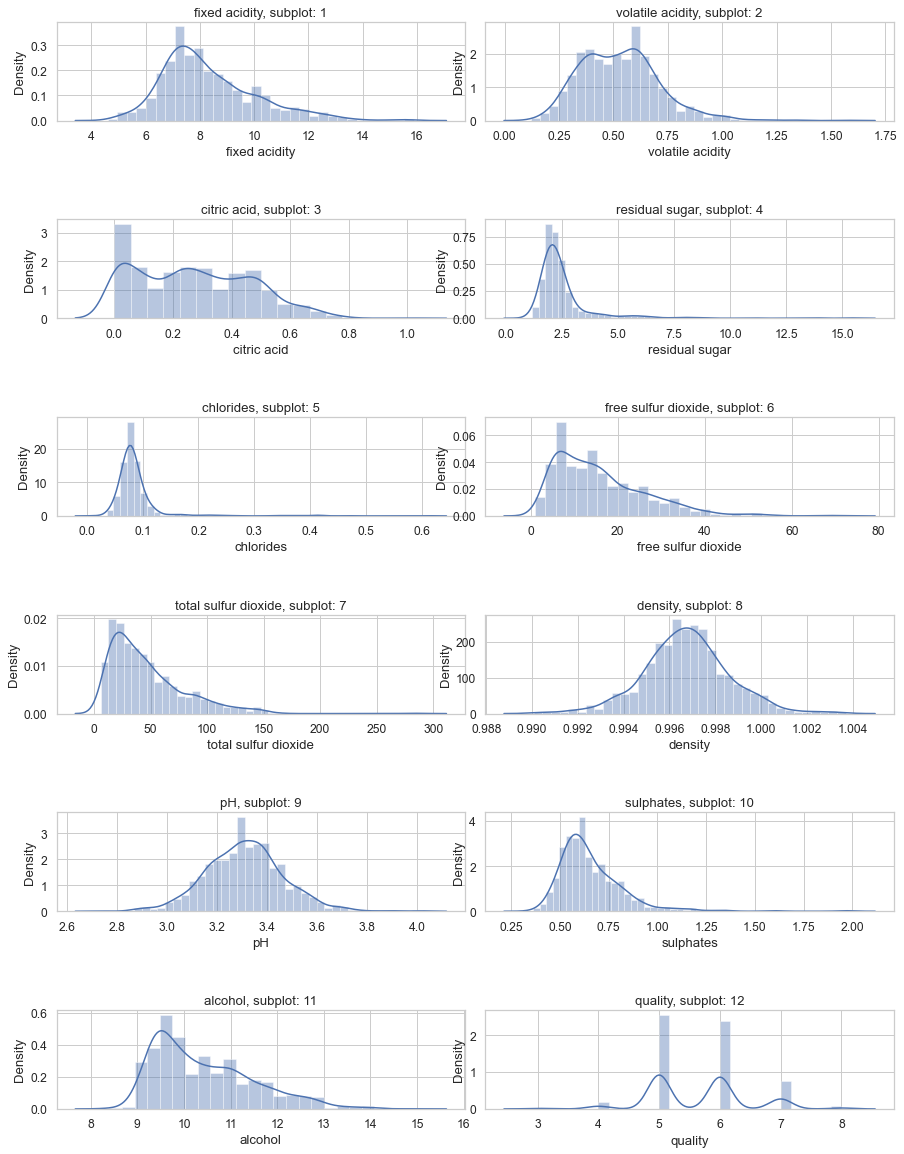

In [7]:
a = 6  
b = 2  
c = 1 

plt.subplots_adjust(wspace=0.05, hspace=1)
for i in wine:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}'.format(i, c))
    plt.xlabel(i)
    sns.distplot(wine[i])
    c = c + 1
plt.show()

##### 2.e. Do you see any skewed distributions?

In [9]:
len(wine.columns)

12

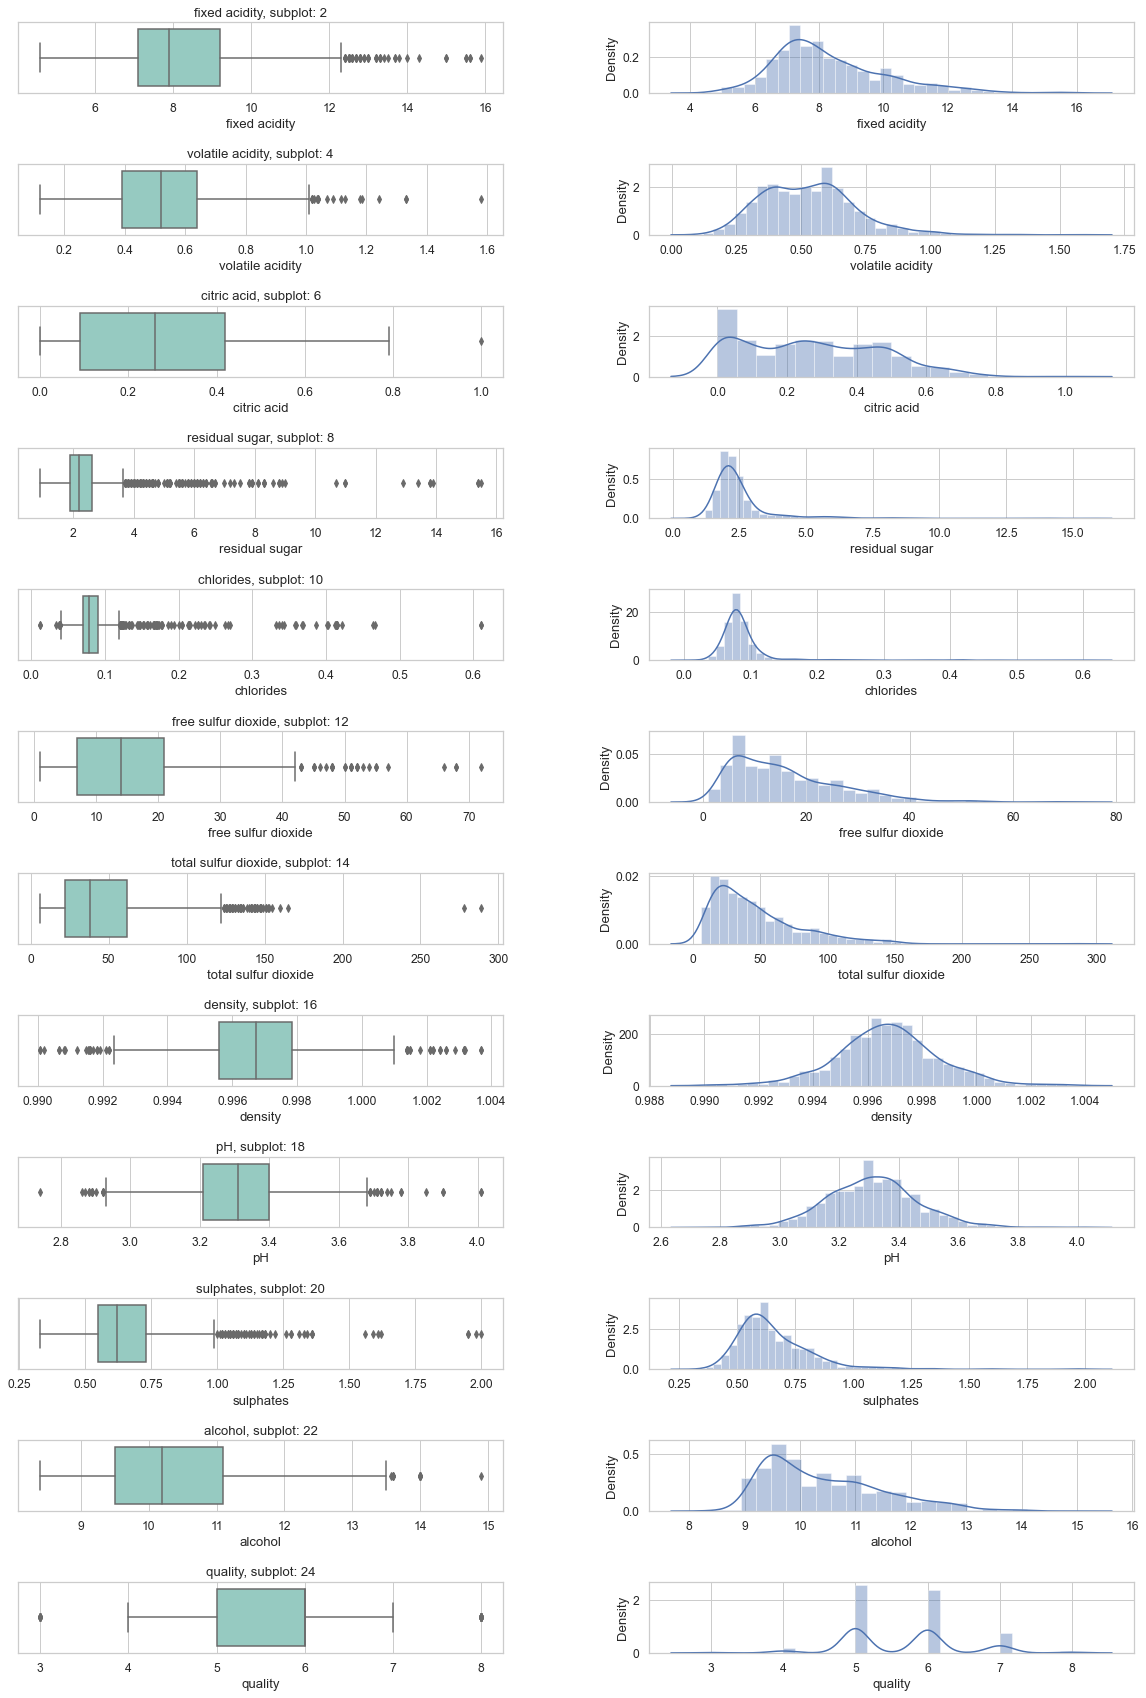

In [8]:
a = 12  
b = 2  
c = 1 

plt.subplots_adjust(wspace=0.3, hspace=1)
for i in wine:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}'.format(i, c))
    plt.xlabel(i)
    sns.boxplot(wine[i], color = 0.7, saturation=0.75, palette="Set3")
    c = c + 1
    plt.title('{}, subplot: {}'.format(i, c))
    plt.xlabel(i)
    plt.subplot(a, b, c)
    sns.distplot(wine[i])
    c = c + 1
plt.show()

In [84]:

wine.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [11]:
wine.kurt()

fixed acidity            1.132143
volatile acidity         1.225542
citric acid             -0.788998
residual sugar          28.617595
chlorides               41.715787
free sulfur dioxide      2.023562
total sulfur dioxide     3.809824
density                  0.934079
pH                       0.806943
sulphates               11.720251
alcohol                  0.200029
quality                  0.296708
dtype: float64

Answer.  Yes, the distributions are rightly skewed. Residual sugar and chlorides have the maximum skewness. Density and ph are the least skewed.

Based on the box plots, the skewness in the distributions are mostly because of the outliers.
